# import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# read data sets

In [2]:
directory = './MNIST_Dataset/'


## Train set

In [3]:
train_images_file = open(directory+'train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open(directory+'train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))

## Test set

In [4]:
# Reading The Test Set
test_images_file = open(directory+'t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open(directory+'t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))

## Plot a sample 

In [5]:
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

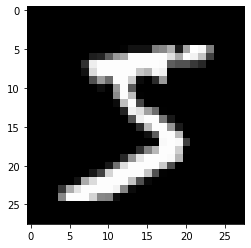

lable =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
show_image(train_set[0][0])
plt.show()
print("lable = ",train_set[0][1])


# basic functions

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def derivativeSigmoid(z):
    return  sigmoid(z) * (1 - sigmoid(z))

In [9]:
def make_sequential_network (layers):
    weights = list()
    biases = list()
    for i in range(len(layers)-1):
        weights.append(np.random.normal(0, .5, size=(layers[i+1], layers[i])))
        biases.append(np.random.normal(0, .5, size=(layers[i+1],1)))
    return weights,biases

In [10]:
def allocate_gradient_values (layers):
    g_weights = list()
    g_biases = list()
    for i in range(len(layers)-1):
        g_weights.append(np.zeros((layers[i+1], layers[i])))
        g_biases.append(np.zeros((layers[i+1],1)))
    return g_weights,g_biases
    

In [11]:
def forward_propagation(flatten_input , current_weights,current_biases):
    network_output_layers = list()
    network_output_layers.append(flatten_input)
    z_layers= list()
    for (w,b) in zip(current_weights,current_biases):
        z = np.dot(w,network_output_layers[-1])+b
        z_layers.append(z)
        network_output_layers.append(sigmoid(z))
    return network_output_layers , z_layers

In [12]:
def backpropagation (image,weights,biases,gradients):
    
    grad_weights , grad_biases = gradients
    
    grad_a0 = np.zeros((784, 1))
    grad_a1 = np.zeros((16, 1))
    grad_a2 = np.zeros((16, 1))
    
    image_pixels , image_lable = image[0] , image[1]
    
    a_layers , z_layers = forward_propagation(image_pixels, weights, biases)
    
    loss_i = pow((a_layers[3]-image_lable),2)

                
    #### layer 3
    for j in range(10):
        b = 2 * (a_layers[3][j] - image_lable[j]) * derivativeSigmoid(z_layers[2][j])
        grad_biases[2][j] +=b
        for k in range(16):
            grad_weights[2][j][k] +=b*a_layers[2][k]
                
    for k in range(16):
        for j in range(10):
            grad_a2[k] += 2 *(a_layers[3][j]-image_lable[j]) * derivativeSigmoid(z_layers[2][j]) *weights[2][j][k]
            

    ########layer 2
    for j in range(16):
        b = grad_a2[j] * derivativeSigmoid(z_layers[1][j])
        grad_biases[1][j] +=b
        for k in range(16):
            grad_weights[1][j][k] +=b*a_layers[1][k]
                
    for k in range(16):
        for j in range(16):
            grad_a1[k] += 2 * grad_a2[j] * derivativeSigmoid(z_layers[1][j]) * weights[1][j][k]
            
            
    ########layer 1
    for j in range(16):
        b = grad_a1[j] * derivativeSigmoid(z_layers[0][j])
        grad_biases[0][j] +=b
        for k in range(784):
            grad_weights[0][j][k] +=b*a_layers[0][k]
            

    return grad_weights,grad_biases ,loss_i  

# nueral network train and predict functions

In [26]:
def train_model(learning_rate, number_of_epochs, batch_size, number_of_samples,weights,biases):
#     cost_by_epochs = np.zeros((10 ,number_of_epochs))
    cost_each_epoch = list()
    for i in range(number_of_epochs):
        
        if(i%10==0):
            print("EPOCH {}".format(i+1))
            
            
        samples = train_set
        np.random.shuffle(samples)
        batches = [samples[x:x+batch_size] for x in range(0, number_of_samples, batch_size)]
        cost = np.zeros((10,1))
        for batch in batches:
            grad_weights,grad_biases = allocate_gradient_values(units_of_layers)
            for image in batch:
                    grad_weights,grad_biases,loss_i = backpropagation(image,weights,biases,(grad_weights,grad_biases))
                    cost+=loss_i
            weights[0] -= learning_rate * (grad_weights[0] / batch_size)
            weights[1] -= learning_rate * (grad_weights[1] / batch_size)
            weights[2] -= learning_rate * (grad_weights[2] / batch_size)

            biases[0] -= learning_rate * (grad_biases[0] / batch_size)
            biases[1] -= learning_rate * (grad_biases[1] / batch_size)
            biases[2] -= learning_rate * (grad_biases[2] / batch_size)
        cost_each_epoch.append(cost)
    
    cost_each_epoch = np.array(cost_each_epoch)/number_of_samples
    return weights,biases,cost_each_epoch
                

In [20]:
def evaluating_model (weights,biases,size=100):
    
    np.random.shuffle(test_set)
    images = test_set
    
    correct = 0.0
    error =0

    for i in range(size):
        img = images[i]
        
        image , label = img[0] , img[1]
        
        output,_ = forward_propagation(image, weights, biases)
        output = output[-1]
        output = np.array(output)
        
        max_index = 0
        true_label = 0
        maximum = -1
        
        for j in range(10):
            if output[j] > maximum:
                maximum = output[j]
                max_index = j
            if label[j] == 1:
                true_label = j
        
        if max_index == true_label:
            correct += 1  
        else:
            error += 1
    
    print("model accuracy = ",(correct/size))
    

In [21]:
def show_cost_funtion (cost_each_epoch):
    plt.plot([np.linalg.norm(x)**2 for x in cost_each_epoch])
    plt.show

## define number of unit for each layer

In [22]:
units_of_layers = [784,16,16,10]

## fit model 

In [27]:
def model(learning_rate, number_of_epochs, batch_size, number_of_samples):
    weights,biases = make_sequential_network(units_of_layers)
    weights,biases,cost_each_epoch = train_model(learning_rate, number_of_epochs, 
                                                 batch_size, number_of_samples,weights,biases)
    evaluating_model(weights,biases)
    show_cost_funtion(cost_each_epoch)

### learning rate = 1

EPOCH 1
EPOCH 11
EPOCH 21
EPOCH 31
EPOCH 41
EPOCH 51
EPOCH 61
EPOCH 71
EPOCH 81
EPOCH 91
EPOCH 101
EPOCH 111
EPOCH 121
EPOCH 131
EPOCH 141
EPOCH 151
EPOCH 161
EPOCH 171
EPOCH 181
EPOCH 191
model accuracy =  0.9


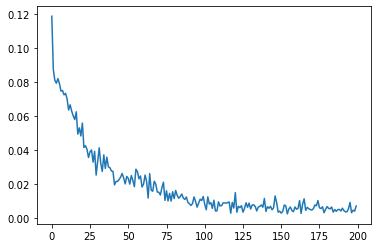

In [28]:
model(1,200,10,100)

#### learning rate is too large

### learning rate = 0.5

EPOCH 1
EPOCH 11
EPOCH 21
EPOCH 31
EPOCH 41
EPOCH 51
EPOCH 61
EPOCH 71
EPOCH 81
EPOCH 91
EPOCH 101
EPOCH 111
EPOCH 121
EPOCH 131
EPOCH 141
EPOCH 151
EPOCH 161
EPOCH 171
EPOCH 181
EPOCH 191
model accuracy =  0.91


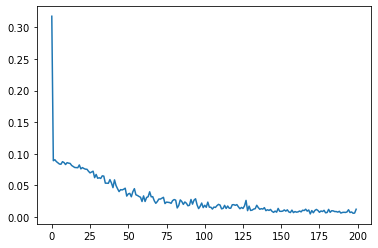

In [29]:
model(0.5,200,10,100)

EPOCH 1
EPOCH 11
EPOCH 21
EPOCH 31
EPOCH 41
EPOCH 51
EPOCH 61
EPOCH 71
EPOCH 81
EPOCH 91
EPOCH 101
EPOCH 111
EPOCH 121
EPOCH 131
EPOCH 141
EPOCH 151
EPOCH 161
EPOCH 171
EPOCH 181
EPOCH 191
model accuracy =  0.62


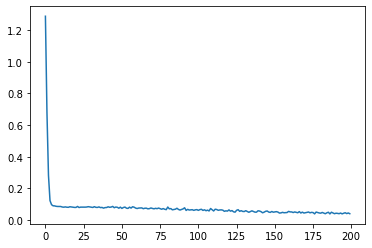

In [32]:
model(0.1,200,10,100)

#### learning rate is too small

In [ ]:
model(0.3,200,10,100)

EPOCH 1
EPOCH 11
EPOCH 21
EPOCH 31
EPOCH 41
EPOCH 51
EPOCH 61
EPOCH 71
EPOCH 81
EPOCH 91
EPOCH 101
EPOCH 111
EPOCH 121
EPOCH 131
EPOCH 141
EPOCH 151
EPOCH 161
EPOCH 171
EPOCH 181
EPOCH 191
model accuracy =  0.83
